# Решающие деревья

![](https://drive.google.com/uc?id=13kmqLXa-3FBUJq0Q3XVOkz8TENpVTkqk)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM), о которых мы поговорим на дальнейших занятиях.

## Как строятся решающие деревья?

Decision tree building is started from the root node. The selection rule is estimated to maximize **information gain** for the node plit:

$$
\Delta I_{node} = I_{node} - (I_{left} \frac{N_{left}}{N_{node}} + I_{right} \frac{N_{right}}{N_{node}})
$$

where $I_{node}$ is impurity of a node. 

### **Popular impurity functions**

**Gini**

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. But what is actually meant by ‘impurity’? If all the elements belong to a single class, then it can be called pure. The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.

$$
I_{node} = G(node) = \sum_{i}^{C}p_{i}(1 - p_{i}) = 1 - \sum_{i}^{C}p_{i}^2
$$

**Entropy**

Entropy is the degree of uncertainty, impurity or disorder. In this case we aim to reduce the level of entropy and, thus, to reduce the chaos and "gain information".

$$
I_{node} = E(node) = -\sum_{i}^{C}p_{i}log(p_{i})
$$

**Classification error**

$$
I_{node} = 1 - \max_{i}p_{i}
$$

where $p_{i}$ is fraction of objects of class $i$ in the node:

$$
p_{i} = \frac{N_{i}}{\sum_{i}^{C}N_{i}}
$$

Let's look at the example:




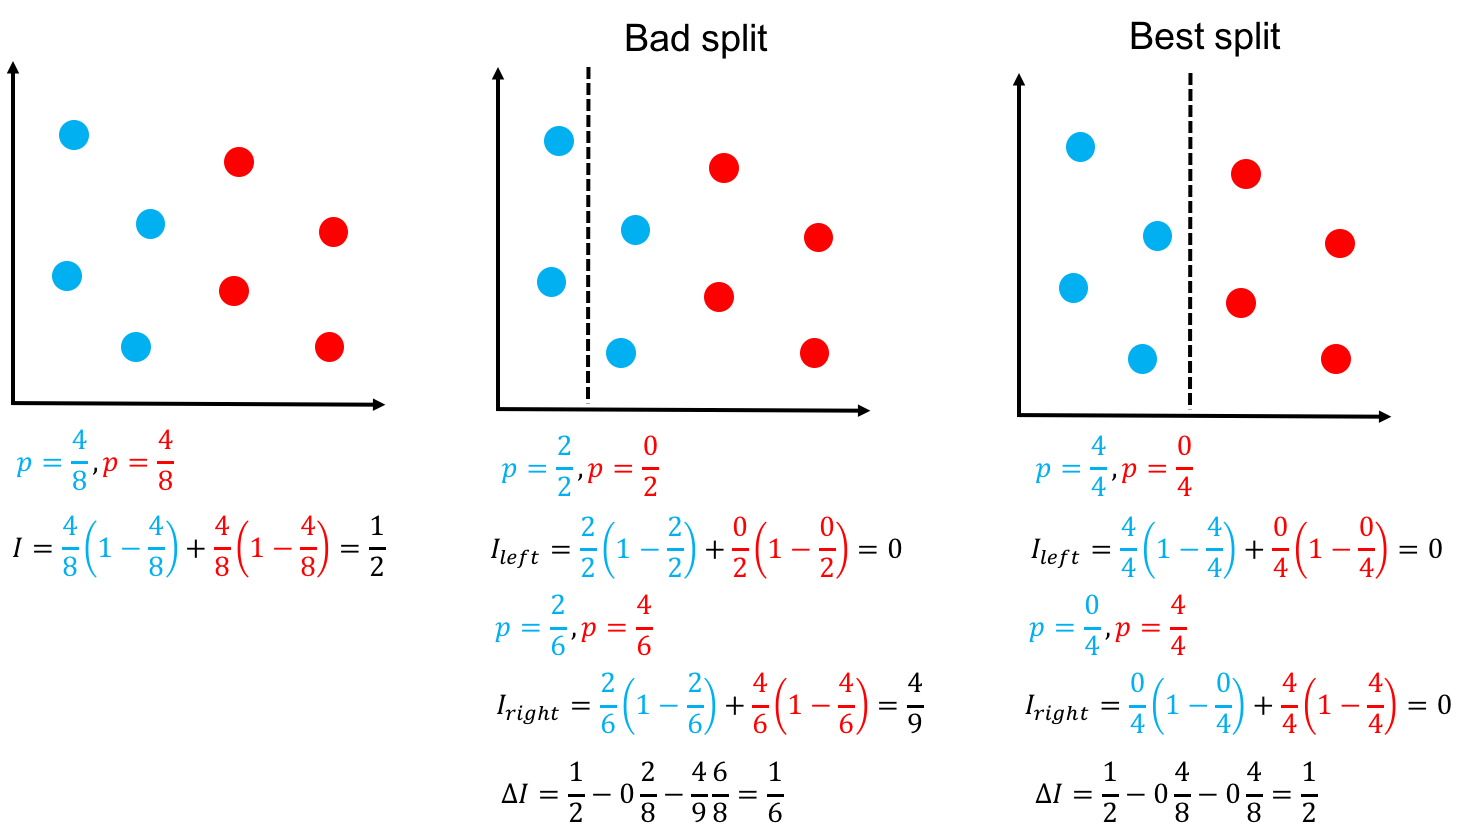

[Good explanation](https://blog.quantinsti.com/gini-index/#Information-Gain) of impurity criteria.

**Prediction stage**

At the prediction stage the class of the example is predicted as the most popular class in the `Leaf` where it falls.

## Линейные модели или решающие деревья?

Раньше мы разбирали только линейные модели, которые имеют совсем другую природу по отношению к решающим деревьям. Можно ли сказать, что какой-то из этих двух типов моделей всегда лучше? Нет. В зависимости от пространственной структуры данных, один из них будет работать лучше:

- Линейная модель, если данные хорошо линейно разделимы

- Решающие деревья, если данные плохо линейно разделимы (присутствуют только кусочно-линейные или нелинейные зависимости)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 6.5)

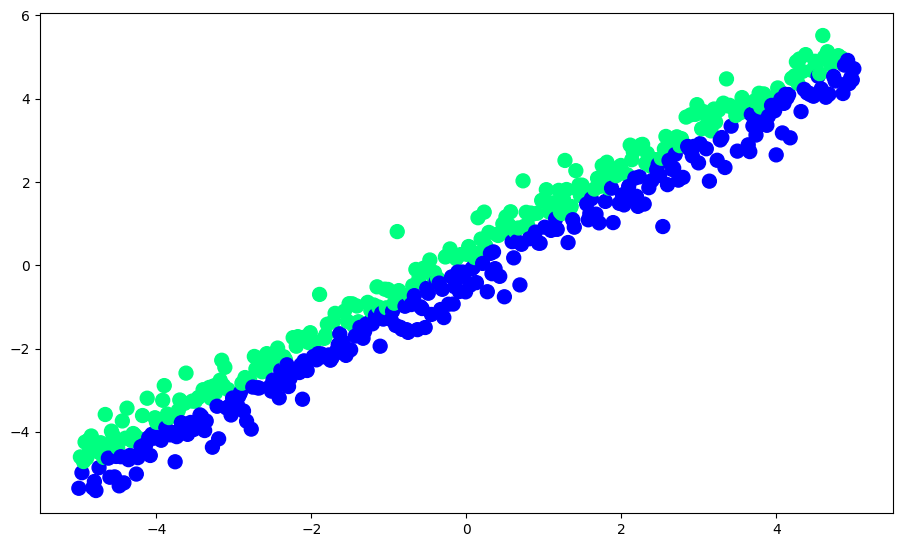

In [2]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

Linear model accuracy: 0.99


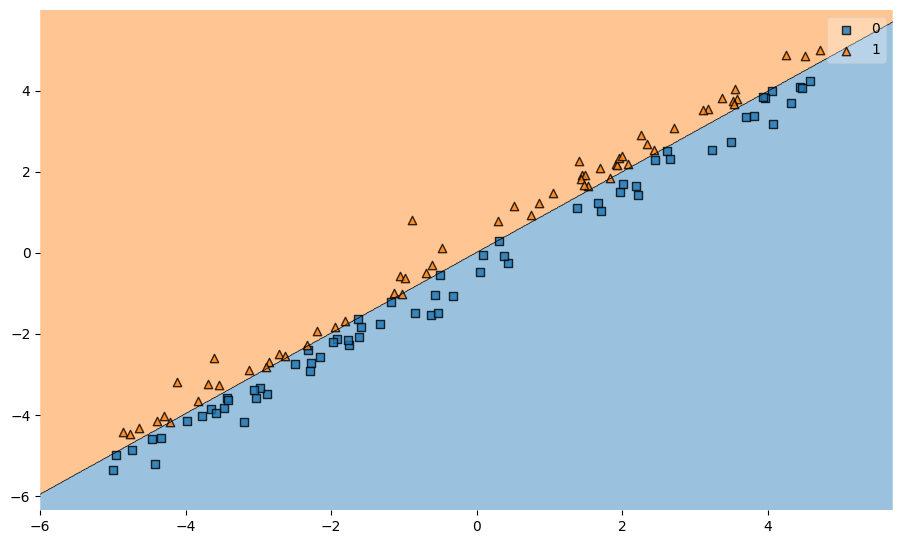

In [5]:
# !pip install mlxtend
# !pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X=X_test, y=y_test, clf=lr)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

Decision tree accuracy: 0.86


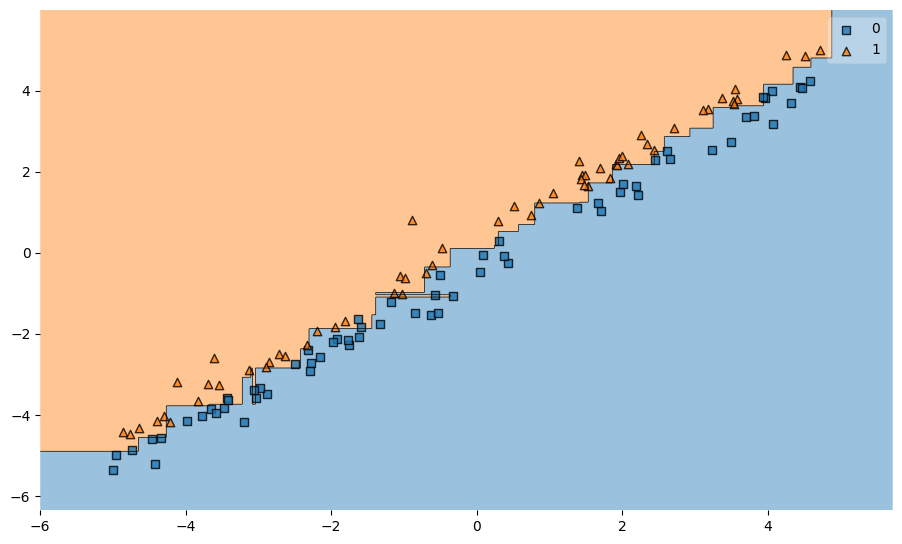

In [7]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

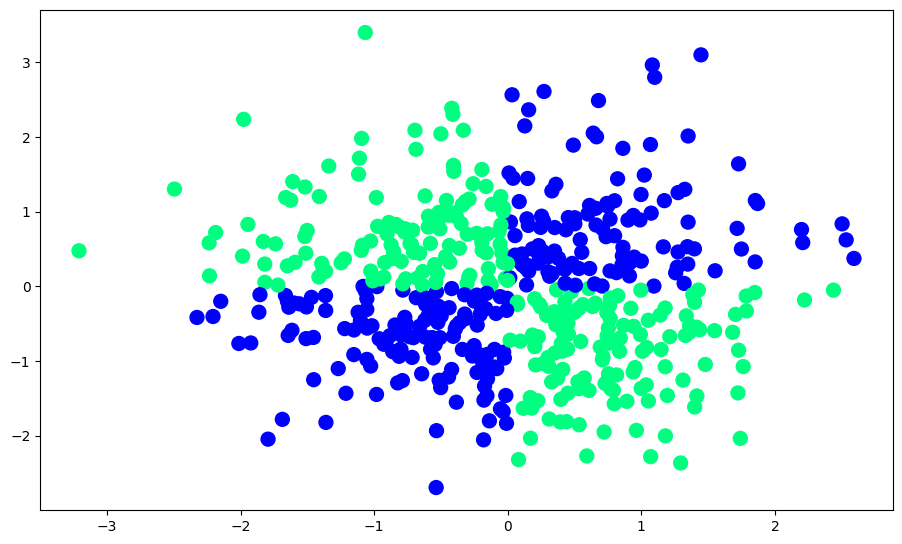

In [8]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Linear model accuracy: 0.39


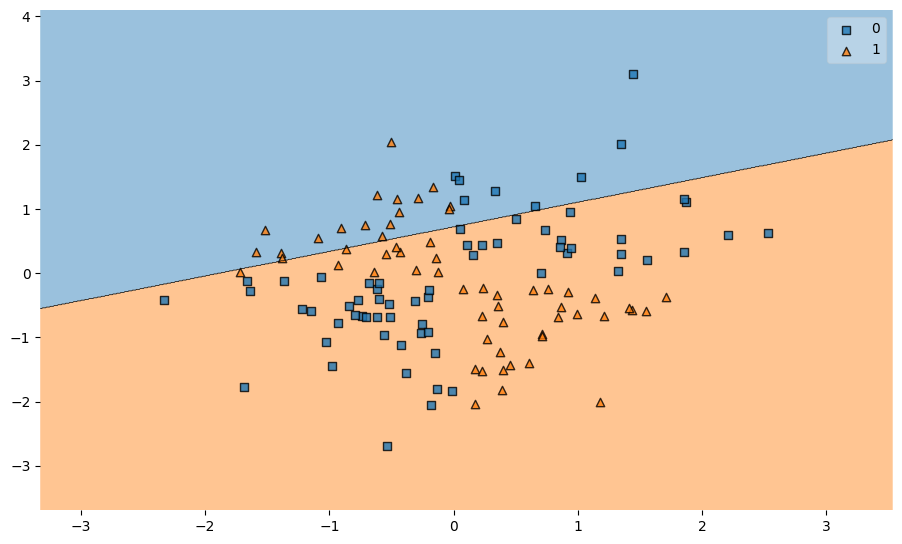

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr)
plt.show()

Linear model accuracy: 0.97


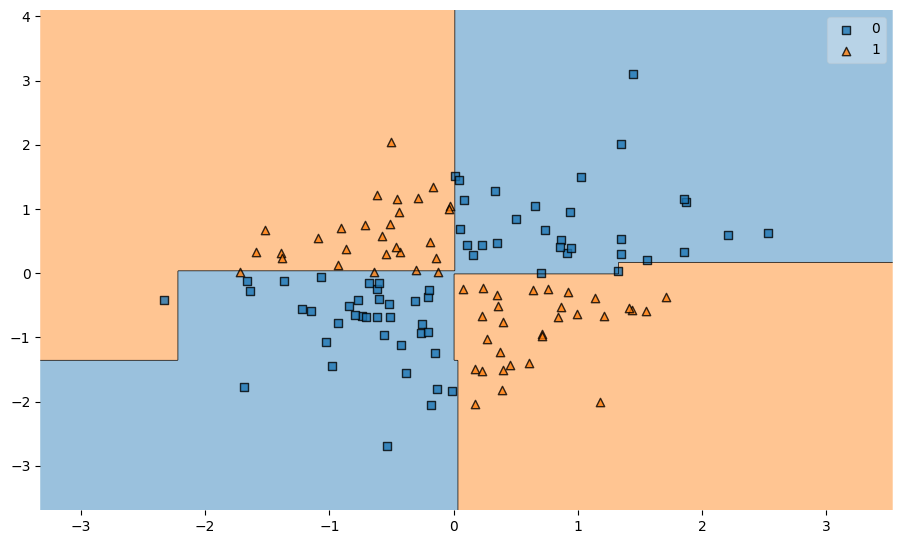

In [10]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

Решающие деревья способны переобучиться под любую выборку, если их никак не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. По сути дерево просто выучивает обучающую выборку, но выделяет никаких закономерностей среди данных. Давайте убедимся в этом эффекте на практике, сгенерировав два трудноразделимых множества объектов.

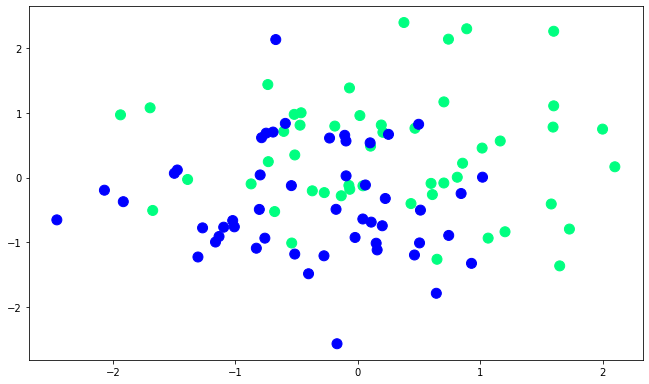

In [ ]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Посмотрим, как влияют разные значения гиперпараметров решающего дерева на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

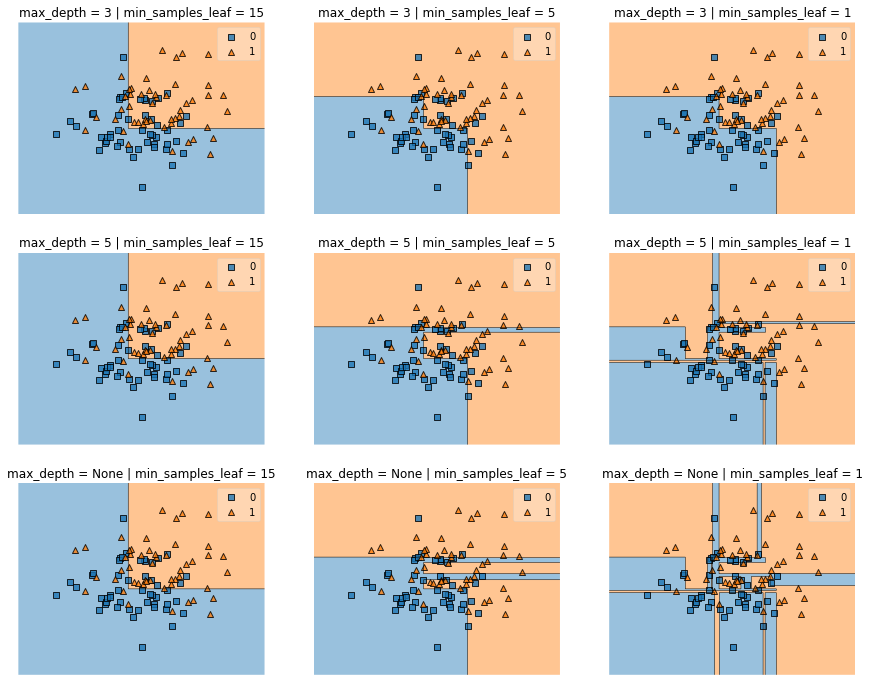

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])
        
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Decision tree accuracy: 1.00


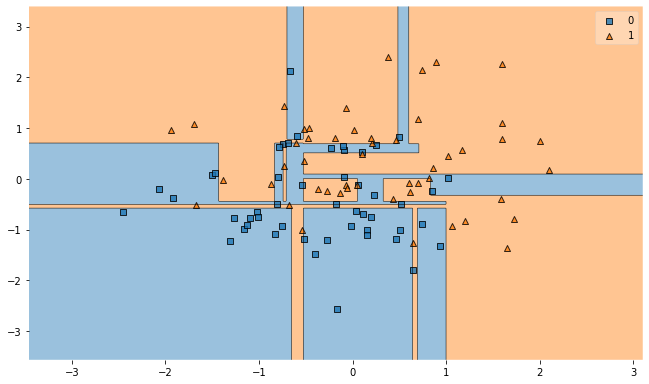

In [ ]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)

print(f"Decision tree accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, dt)
plt.show()

## Неустойчивость

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

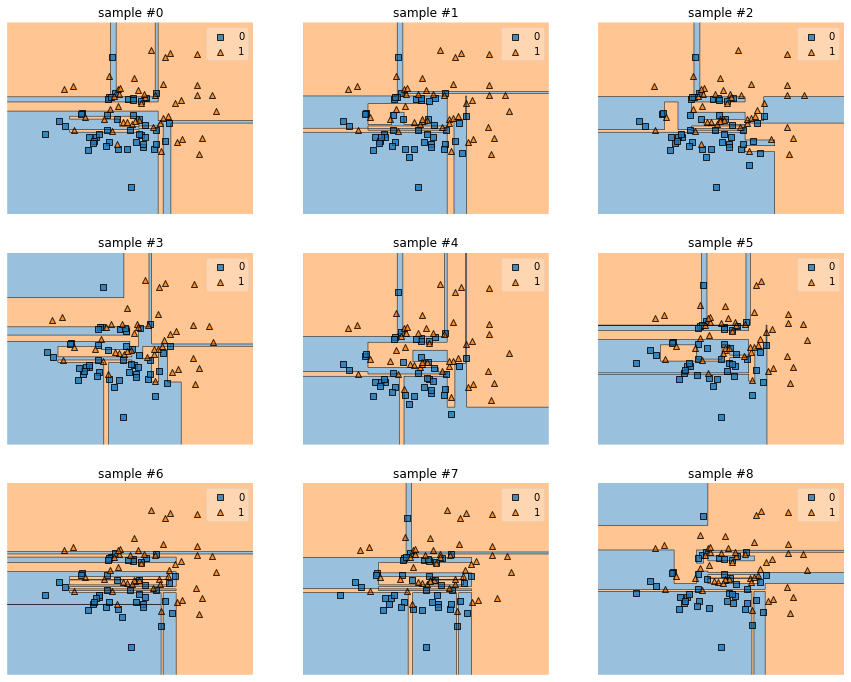

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
        
plt.show()

## Практика

In [ ]:
import pandas as pd

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]

print(f"Data shape: {X.shape}")
X.head()

Data shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

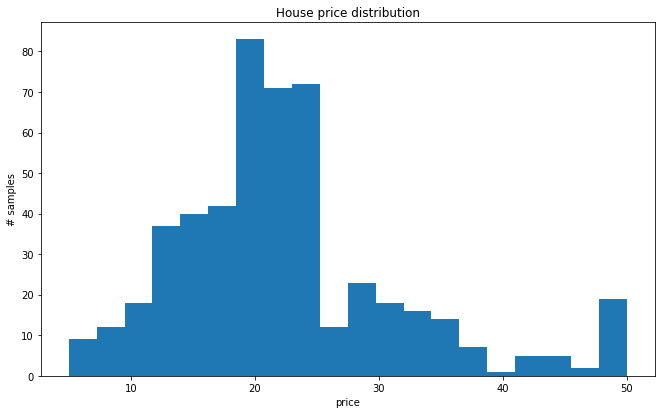

In [ ]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

### Решающее дерево: sklearn

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

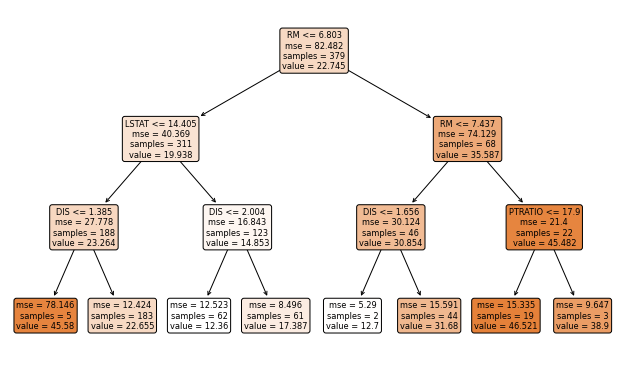

In [ ]:
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
mean_squared_error(y_test, dt.predict(X_test))

37.7071346843913

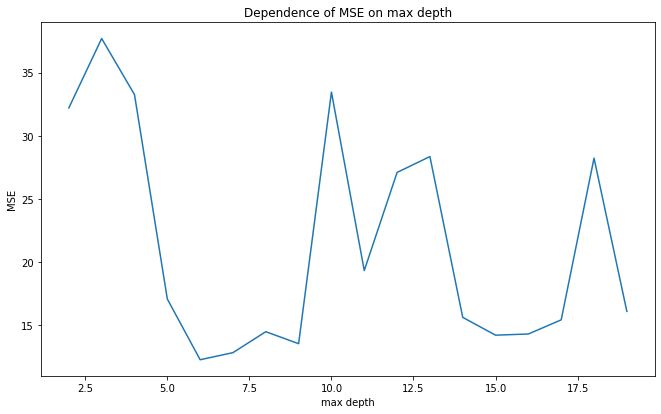

In [ ]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [ ]:
pd.DataFrame({
    "max_depth": max_depth_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599
5,8,14.481238
6,17,15.420090
7,14,15.616905
8,19,16.090492
9,5,17.071137


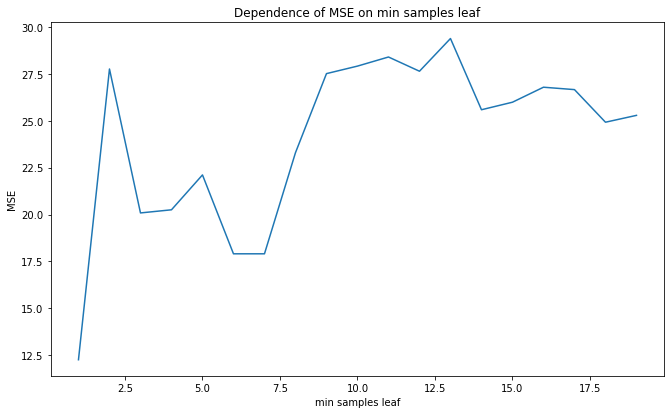

In [ ]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
    
plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

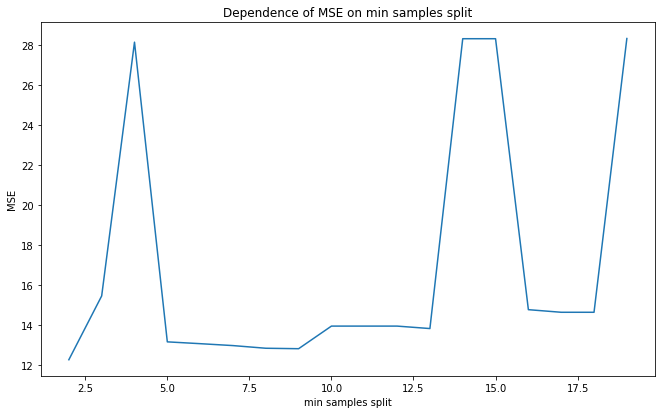

In [ ]:
min_samples_split_array = range(2, 20)
mse_array = []

for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_split_array, mse_array)
plt.title("Dependence of MSE on min samples split")
plt.xlabel("min samples split")
plt.ylabel("MSE")
plt.show()

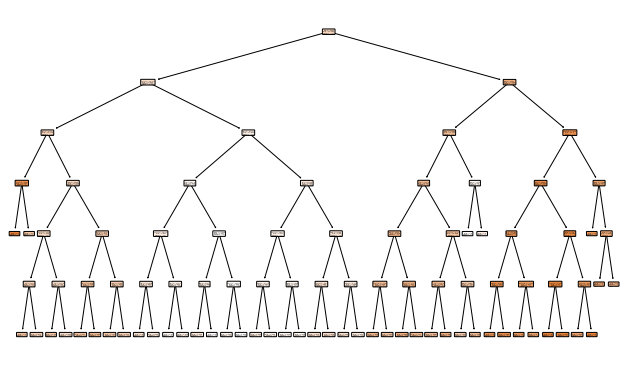

In [ ]:
dt = DecisionTreeRegressor(max_depth=6, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
mean_squared_error(y_test, dt.predict(X_test))

12.259769039156408

In [ ]:
dt.feature_importances_

array([0.0017915 , 0.        , 0.00353474, 0.        , 0.02687167,
       0.59766384, 0.00478304, 0.11292126, 0.0035135 , 0.02381713,
       0.0062183 , 0.00726   , 0.21162502])

In [ ]:
pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,RM,0.597664
1,LSTAT,0.211625
2,DIS,0.112921
3,NOX,0.026872
4,TAX,0.023817
5,B,0.007260
6,PTRATIO,0.006218
7,AGE,0.004783
8,INDUS,0.003535
9,RAD,0.003514


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [ ]:
print("No scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test)):.2f}")

No scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26


In [ ]:
print("Standard scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test_scaled)):.2f}")

Standard scaling is applied

MSE on test set for depth 3: 37.71
MSE on test set for depth 6: 12.26


## Бонус для самых смелых: решающее дерево своими руками

In [11]:
class Node(object):
    
    def __init__(self):
        """
        Class for a decision tree node.
        """
        
        self.right = None
        self.left = None
        
        self.threshold = None
        self.column = None
        
        self.depth = None
        self.probas = None
        
        self.is_terminal = False

In [12]:
class DecisionTreeClassifier_from_scratch(object):
    
    def __init__(self, max_depth=3, min_samples_leaf=1, min_samples_split=2, impurity='gini'):
        """
        Class for a Decision Tree Classifier.
        
        Parameters
        ----------
        max_depth : int
            Max depth of a decision tree.
        min_samples_leaf : int
            Minimal number of samples (objects) in a leaf (terminal node).
        min_samples_split : int
            Minimal number of samples (objects) in a node to make a split.
        impurity : str
            Impurity function used for the decision tree building.
        """
        
        # Make hyperparameters visible inside the class
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.impurity = impurity
        
        # Object for the decision tree
        self.Tree = None
        
        # Helping objects
        self.classes = []
        
    def get_params(self, deep=True):
        """
        Returns class parameters.

        Parameters
        ----------
        deep : boolean
            If True, will return the parameters for this estimator and contained subobjects that are estimators.

        Returns
        -------
        params : dict
            Parameters of the class.
        """

        params = {'max_depth': self.max_depth,
                  'min_samples_leaf': self.min_samples_leaf,
                  'min_samples_split': self.min_samples_split,
                  'impurity': self.impurity}

        return params
    
    
    def set_params(self, **params):
        """
        Set class parameters.

        Parameters
        ----------
        params : dict
            Dictionary of the class parameters.
        """

        for key, value in params.items():
            setattr(self, key, value)

        return self

        
    
    def node_probabilities(self, y):
        """
        Estimate probabilities of classes in data.
        
        Parameters
        ----------
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
            
        Returns
        -------
        probas : numpy.array, shape = (n_objects, n_classes)
            2D array with predicted probabilities of each class. 
            Example:
                y_predicted_proba = [[0.1, 0.9],
                                     [0.8, 0.2], 
                                     [0.0, 1.0], 
                                     ...]
        """
        
        # To store probas
        probas = []
        
        # For each class in data ...
        for one_class in self.classes:
            
            # Estimate probability of the class
            class_proba = 1. * (y == one_class).sum() / len(y)
            # class_proba = 0.8 (example)
            
            # Store the probability
            probas.append(class_proba)
        
        return probas
    
    
    def gini_calculation(self, probas):
        """
        Calculate gini value.
        
        Parameters
        ----------
        probas : numpy.array, shape = (n_objects, n_classes)
            2D array with predicted probabilities of each class. 
            Example:
                probas = [0.1, 0.9]
            
        Returns
        -------
        gini : float
            Gini value.
        """
        
        gini = 1
        for p in probas:
            gini -= p**2
        
        return gini
    
    
    def impurity_calculation(self, y):
        """
        Calculate data impurity.
        
        Parameters
        ----------
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
            
        Returns
        -------
        impurity : float
            Impuroty of the data.
        """
                
        # Estimate probabilities for each class
        probas = self.node_probabilities(y)
        # probas = [0.90, 0.10] (example)
        
        # Calculate impurity of the data
        if self.impurity == 'gini':
            impurity = self.gini_calculation(probas)
            # impurity = 0.6 (example)
        
        return impurity
        
    
    def best_split(self, X, y):
        """
        Make the best split of data in a decision tree node.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
            
        Returns
        -------
        best_split_column : int
            Index of the best split column
        best_threshold : float
            The best split condition.
        X_left : numpy.array, shape = (n_objects, n_features)
            Matrix of objects in the left child that are described by their input features.
        y_left : numpy.array, shape = (n_objects)
            1D array with the object labels in the left child. 
            For the classification labels are integers in {0, 1, 2, ...}.
        X_right : numpy.array, shape = (n_objects, n_features)
            Matrix of objects in the right child that are described by their input features.
        y_right : numpy.array, shape = (n_objects)
            1D array with labels of the objects in the right child. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        best_information_gain = -999
        
        # Data impurity before the split
        impurity = self.impurity_calculation(y)
        # impurity = 0.8 (example)
        
        # For each column in X ...
        for split_column in range(X.shape[1]):
            
            # Select values of the column
            x_col = X[:, split_column]
            # x_col = [2.6, 1.3, 0.5, ...] (example)
            
            # For each value in the column ...
            for i_x in range(0, len(x_col)):
                
                # Take the value as a threshold for a split
                threshold = x_col[i_x]
                # threshold = 1.3 (example)
                
                # Make the split into right and left childs
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                # y_left = [0, 1, 1, 0, 1] (example)
                
                if len(y_right) == 0 or len(y_left) == 0:
                    continue
                
                # Calculate impurity for each child
                impurity_left = self.impurity_calculation(y_left)
                impurity_right = self.impurity_calculation(y_right)
                # impurity_right = 0.6 (example)
                
                # Calculate information gain of the split
                information_gain = impurity
                information_gain -= impurity_left * len(y_left) / len(y)
                information_gain -= impurity_right * len(y_right) / len(y)
                # information_gain = 0.2 (example)
                
                # Is this information_gain the best?
                if information_gain > best_information_gain:
                    best_split_column = split_column
                    best_threshold = threshold
                    best_information_gain = information_gain
                    
        # If no split available
        if best_information_gain == -999:
            return None, None, None, None, None, None
        
        # Take the best split parameters and make this split
        x_col = X[:, best_split_column]
        X_left = X[x_col <= best_threshold, :]
        y_left = y[x_col <= best_threshold]
        X_right = X[x_col > best_threshold, :]
        y_right = y[x_col > best_threshold]
        
        return best_split_column, best_threshold, X_left, y_left, X_right, y_right
                    
                
    
    def decision_tree(self, node, X, y):
        """
        Functions builds a decision tree.
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Check termination conditions
        if node.depth >= self.max_depth:      # max_depth check
            node.is_terminal = True
            return
        if len(X) < self.min_samples_split:   # min_samples_split check
            node.is_terminal = True
            return
        if len(np.unique(y)) == 1:
            node.is_terminal = True
            return
        
        # Make best split
        split_column, threshold, X_left, y_left, X_right, y_right = self.best_split(X, y) # Make a split
        # split_column = 2 (exmaple) column index of the split
        # threshold = 2.74 (example) split_column > threshold
        
        # Check additional termination conditions
        if split_column is None:
            node.is_terminal = True
            return
        if len(X_left) < self.min_samples_leaf or len(X_right) < self.min_samples_leaf:  # min_samples_leaf check
            node.is_terminal = True
            return
        
        
        # Add split parameters into the current node
        node.column = split_column
        node.threshold = threshold
        
        # Create a left child of the current node
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.node_probabilities(y_left)
        
        # Create a right child of the current node
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.node_probabilities(y_right)
        
        # Make splits for the left and right nodes
        self.decision_tree(node.right, X_right, y_right)
        self.decision_tree(node.left, X_left, y_left)
        
    
    def fit(self, X, y):
        """
        Fit the Decision Tree Classifier.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Get unique class labels
        self.classes = np.unique(y)
        # self.classes = [0, 1] (example)
        
        # Create a root node of a decision tree
        self.Tree = Node()                             # Create an empty node
        self.Tree.depth = 1                            # the node depth
        self.Tree.probas = self.node_probabilities(y)  # init class probabilities
        
        # Build the decision tree
        self.decision_tree(self.Tree, X, y)
        
    
    def one_prediction(self, node, x):
        """
        Functions builds a decision tree.
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        x : numpy.array, shape = (n_features,)
            Array of feature values of one object.
        """
        
        # Termination condition
        if node.is_terminal == True:     # If it is a leaf (terminal node, no childs)
            return node.probas                           # Return probas of the terminal node
            # node.probas = [0.9, 0.1] (example)
        
        # Run to the current node's childs
        # Check split condition. If yes, go to the right child
        if x[node.column] > node.threshold:
            # Right child
            probas = self.one_prediction(node.right, x)
            # probas = [0.9, 0.1] (example)
        else: 
            # Left child
            probas = self.one_prediction(node.left, x)
            # probas = [0.9, 0.1] (example)
            
        return probas
    
    
    def predict_proba(self, X):
        """
        Predict class probabilities for unknown objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted_proba : numpy.array, shape = (n_objects, n_classes)
            2D array with predicted probabilities of each class. 
            Example:
                y_predicted_proba = [[0.1, 0.9],
                                     [0.8, 0.2], 
                                     [0.0, 1.0], 
                                     ...]
        """
        
        # Create an empty list for predicted probabilities
        y_predicted_proba = []
        
        # For each object in X make a prediction
        for one_x in X:
            
            # Make the prediction for one object 
            one_proba = self.one_prediction(self.Tree, one_x)
            # one_proba = [0.9, 0.1] (example)
            
            # Store the predictions
            y_predicted_proba.append(one_proba)
        
        return np.array(y_predicted_proba)
    
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Predict probabilities
        y_predicted_proba = self.predict_proba(X)
        # y_predicted_proba = [[0.90, 0.10], 
        #                      [0.23, 0.77], 
        #                       ...]  (example)
        
        # Find class labels with the highest probability
        y_predicted = y_predicted_proba.argmax(axis=1)
        # y_predicted = [0, 1] (example)
        
        return y_predicted

In [13]:
%time
clf = DecisionTreeClassifier_from_scratch(max_depth=10, min_samples_leaf=1, min_samples_split=2, impurity='gini')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 8.34 µs


In [14]:
pred[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [15]:
y_test[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [17]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.95      0.96        58

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

